# TD 4 - La régression linéaire - algo. de descente du gradient

## Packages utiles

In [1]:
from sklearn import datasets # donnees
import os # rep de travail
import pandas as pd # data analysis
from scipy import stats # stat desc
import matplotlib.pyplot as plt # graphiques
import numpy as np # maths
import seaborn as sns

## Les données

In [2]:
#66 Import des données
boston = datasets.load_boston()
print(boston.DESCR)
#0- CRIM     per capita crime rate by town
#1- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
#2- INDUS    proportion of non-retail business acres per town
#3- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#4- NOX      nitric oxides concentration (parts per 10 million)
#5- RM       average number of rooms per dwelling
#6- AGE      proportion of owner-occupied units built prior to 1940
#7- DIS      weighted distances to five Boston employment centres
#8- RAD      index of accessibility to radial highways
#9- TAX      full-value property-tax rate per $10,000
#10- PTRATIO  pupil-teacher ratio by town
#11- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#12- LSTAT    % lower status of the population
#13- MEDV     Median value of owner-occupied homes in $1000's


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
#-- Récupérer les variables explicatives (X) et leur nom, la variable à expliquer (Y)
X = boston.data
names = boston.feature_names
Y = boston.target

### Analyser et sélectionner les données étudiées

In [4]:
#-- Afficher les statistiques descriptives
print(stats.describe(X))
print(names)
print(stats.describe(Y))

DescribeResult(nobs=506, minmax=(array([6.3200e-03, 0.0000e+00, 4.6000e-01, 0.0000e+00, 3.8500e-01,
       3.5610e+00, 2.9000e+00, 1.1296e+00, 1.0000e+00, 1.8700e+02,
       1.2600e+01, 3.2000e-01, 1.7300e+00]), array([ 88.9762, 100.    ,  27.74  ,   1.    ,   0.871 ,   8.78  ,
       100.    ,  12.1265,  24.    , 711.    ,  22.    , 396.9   ,
        37.97  ])), mean=array([3.61352356e+00, 1.13636364e+01, 1.11367787e+01, 6.91699605e-02,
       5.54695059e-01, 6.28463439e+00, 6.85749012e+01, 3.79504269e+00,
       9.54940711e+00, 4.08237154e+02, 1.84555336e+01, 3.56674032e+02,
       1.26530632e+01]), variance=array([7.39865782e+01, 5.43936814e+02, 4.70644425e+01, 6.45129730e-02,
       1.34276357e-02, 4.93670850e-01, 7.92358399e+02, 4.43401514e+00,
       7.58163660e+01, 2.84047595e+04, 4.68698912e+00, 8.33475226e+03,
       5.09947595e+01]), skewness=array([ 5.20765239,  2.21906306,  0.29414628,  3.39579929,  0.72714416,
        0.40241467, -0.59718559,  1.00877876,  1.00183349,  0.6

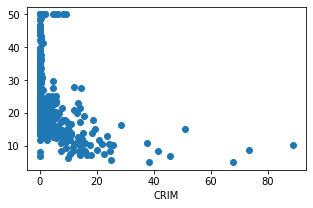

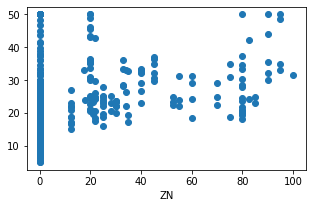

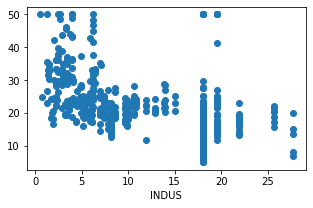

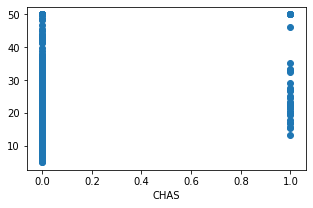

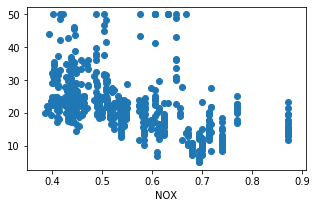

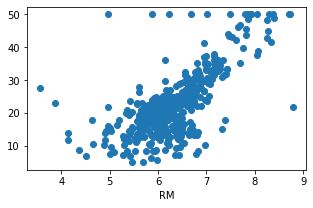

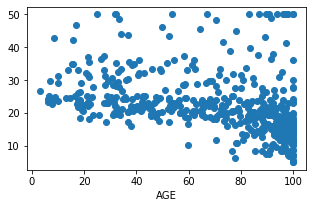

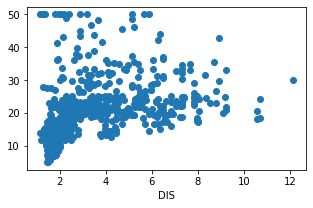

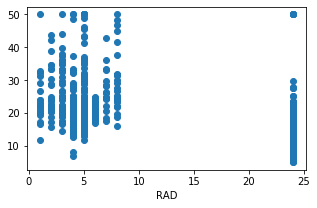

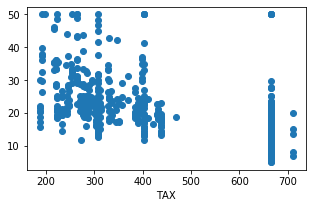

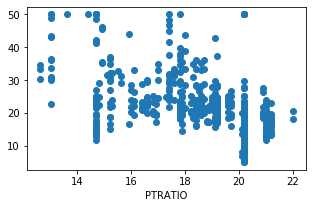

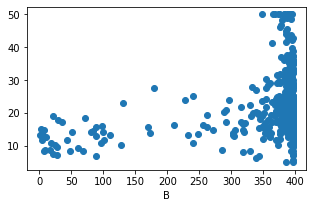

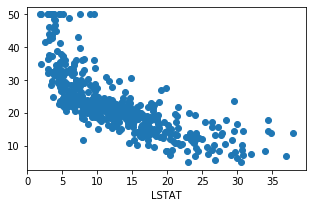

In [5]:
#-- Sélectionner les variables pour la régression simple puis multiple et afficher les (scatterplot)

for i in range(X.shape[1]):
    plt.figure(figsize=(5,3))
    plt.scatter(X[:,i],Y)
    plt.xlabel(names[i])
    plt.show()



In [6]:
#-- Préparer les données étudiées
m,d = X.shape
k = 5
xx = np.hstack((np.ones((m,1)),X))
x1 = np.hstack((np.reshape(xx[:,0],(m,1)), np.reshape(xx[:,k],(m,1))))
x2 = np.hstack((np.reshape(xx[:,0],(m,1)), np.reshape(xx[:,2],(m,1)), np.reshape(xx[:,5],(m,1))))
print(x2)


[[ 1.    18.     0.538]
 [ 1.     0.     0.469]
 [ 1.     0.     0.469]
 ...
 [ 1.     0.     0.573]
 [ 1.     0.     0.573]
 [ 1.     0.     0.573]]


## Algorithme de descente du gradient

Code des fonctions et tests de ces fonctions dans le cas de la régression simple et multiple

ATTENTION : les paramètres des fonctions sont à compléter


In [7]:
#-- Modèle

def f(x,B):
    return np.dot(x,B)

B1 = [2,3]
B2 = [2,3,1]

#-- Test 1 - reg simple
print(f(x1,B1))

#-- Test 2 - reg multiple

print(f(x2,B2))


[3.614  3.407  3.407  3.374  3.374  3.374  3.572  3.572  3.572  3.572
 3.572  3.572  3.572  3.614  3.614  3.614  3.614  3.614  3.614  3.614
 3.614  3.614  3.614  3.614  3.614  3.614  3.614  3.614  3.614  3.614
 3.614  3.614  3.614  3.614  3.614  3.497  3.497  3.497  3.497  3.284
 3.284  3.344  3.344  3.344  3.344  3.344  3.344  3.344  3.344  3.344
 3.317  3.317  3.317  3.317  3.23   3.209  3.23   3.233  3.359  3.359
 3.359  3.359  3.359  3.359  3.2483 3.194  3.194  3.227  3.227  3.227
 3.239  3.239  3.239  3.239  3.311  3.311  3.311  3.311  3.311  3.311
 3.278  3.278  3.278  3.278  3.347  3.347  3.347  3.347  3.467  3.467
 3.467  3.467  3.392  3.392  3.392  3.335  3.335  3.335  3.335  3.335
 3.56   3.56   3.56   3.56   3.56   3.56   3.56   3.56   3.56   3.56
 3.56   3.641  3.641  3.641  3.641  3.641  3.641  3.641  3.641  3.641
 3.743  3.743  3.743  3.743  3.743  3.743  3.743  3.872  3.872  3.872
 3.872  3.872  3.872  3.872  3.872  3.872  3.872  3.872  3.872  3.872
 3.872  3.872  4.613 

In [8]:
#%% Fonction-cout
def cout(x,y,B):
    return (np.sum((f(x,B)-y)**2))/(2*x.shape[0])
#%% Test 1 - reg simple
print(cout(x1,Y,B1))
#%% Test 2 - reg multiple
print(cout(x2,Y,B2))

221.64793909170947
2349.4674978854646


In [20]:
#%% Gradient
def grad(x,y,B,pas):
    #b = B.copy()
    #b[0] = b[0] - (pas * np.sum(f(x,B)-y) / x.shape[0])
    #b[1:] = b[1:] - (pas * np.sum(np.dot(f(x,B)-y,x)) / x.shape[0])
    #return b
    m = X.shape[0]
    return 1/m * np.dot((f(x,B)-y),x)
#%% Test 1 - reg simple
print(B1)
print(grad(x1,Y,B1,0.5))
print(B1)

#%% Test 2 - reg multiple
print(grad(x2,Y,B2,0.5))

[2, 3]
[-734.42868462 -388.12810536]
[2, 3]
[  549.31351538 66574.12628846   160.20916308]


In [49]:

#--- standardisation des X (données centrées-réduites)
# attention : ne pas standardiser X^0...
def standardisation(X):
    x = X[:,1:]
    return np.hstack((X[:,:1],(x - x.mean(axis=0)) / x.std(axis=0,ddof=0)))
#-- Test 1 - reg simple
print(standardisation(x1))

#-- Test 2 - reg multiple
print(standardisation(x2))

[[ 1.         -0.14421743]
 [ 1.         -0.74026221]
 [ 1.         -0.74026221]
 ...
 [ 1.          0.15812412]
 [ 1.          0.15812412]
 [ 1.          0.15812412]]
[[ 1.          0.28482986 -0.14421743]
 [ 1.         -0.48772236 -0.74026221]
 [ 1.         -0.48772236 -0.74026221]
 ...
 [ 1.         -0.48772236  0.15812412]
 [ 1.         -0.48772236  0.15812412]
 [ 1.         -0.48772236  0.15812412]]


In [52]:
#%% Algo de descente du gradient
def grad_descent(init,x,y,pas,converge,ITE_MAX):
    cout_arr = []
    B = np.asarray(init).astype(float)
    new_B = B.copy()
    b_arr = [B]
    nbIt = 0
    x_normalize = standardisation(x) #On suppose que le bias est déjà présent
    #print(stats.describe(x_normalize))
    old_cout = cout(x_normalize,y,B)
    new_cout = old_cout-0.01
    #while(new_cout > converge and new_cout < old_cout and nbIt < ITE_MAX):
    while(np.abs(new_cout-old_cout)>converge and nbIt < ITE_MAX):
        new_B = B - pas * grad(x_normalize,y,B,pas)
        #B = grad(x_normalize,y,B,pas)
        B = new_B.copy()
        old_cout = new_cout
        new_cout = cout(x_normalize,y,B)
        b_arr.append(B.tolist())
        cout_arr.append(new_cout)
        nbIt += 1
    return b_arr,cout_arr
#-- Test 1  - reg simple
b, c = grad_descent((0,0),x1,Y,0.1,10,500)
print(b)
print(c)
#-- Test 2 - reg multiple
b, c =grad_descent((0,0,0),x2,Y,0.05,10,500)

DescribeResult(nobs=506, minmax=(array([ 1.        , -1.46588193]), array([1.        , 2.73234648])), mean=array([ 1.0000000e+00, -8.0710581e-16]), variance=array([0.       , 1.0019802]), skewness=array([0.        , 0.72714416]), kurtosis=array([-3.        , -0.07586422]))
[array([0., 0.])]
[]
DescribeResult(nobs=506, minmax=(array([ 1.        , -0.48772236, -1.46588193]), array([1.        , 3.80423444, 2.73234648])), mean=array([ 1.00000000e+00, -6.34319123e-16,  2.49032240e-15]), variance=array([0.       , 1.0019802, 1.0019802]), skewness=array([0.        , 2.21906306, 0.72714416]), kurtosis=array([-3.        ,  3.97994877, -0.07586422]))


## Test avec plusieurs initialisations : visualisation de la fonction cout et des valeurs des paramètres au cours des itérations

DescribeResult(nobs=506, minmax=(array([ 1.        , -1.46588193]), array([1.        , 2.73234648])), mean=array([ 1.0000000e+00, -8.0710581e-16]), variance=array([0.       , 1.0019802]), skewness=array([0.        , 0.72714416]), kurtosis=array([-3.        , -0.07586422]))
268.6626420683618
111.9035440782171
60.087060337886534
42.959199680122765
37.29761113656362
35.42618157060491
34.8075833462022
34.603106634818126
34.53551716583957
34.51317556866756
34.5100582649099
[22.408863712697755, -3.904631813340749]


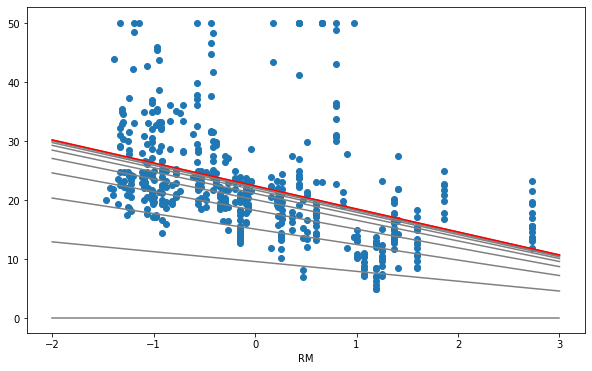

DescribeResult(nobs=506, minmax=(array([ 1.        , -1.46588193]), array([1.        , 2.73234648])), mean=array([ 1.0000000e+00, -8.0710581e-16]), variance=array([0.       , 1.0019802]), skewness=array([0.        , 0.72714416]), kurtosis=array([-3.        , -0.07586422]))
175.92790593372177
81.25021671991274
49.954649147637966
39.6099464219618
36.19052051650496
35.060234433572084
34.686620071221675
34.56312240646029
34.522300439377524
34.51045795016075
[22.65999486883399, -3.947455978635316]


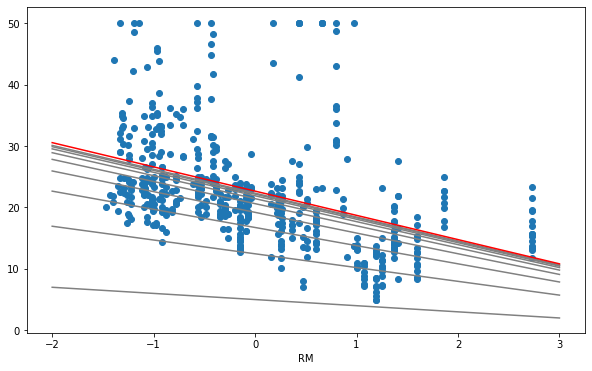

DescribeResult(nobs=506, minmax=(array([ 1.        , -0.48772236, -1.46588193]), array([1.        , 3.80423444, 2.73234648])), mean=array([ 1.00000000e+00, -6.34319123e-16,  2.49032240e-15]), variance=array([0.       , 1.0019802, 1.0019802]), skewness=array([0.        , 2.21906306, 0.72714416]), kurtosis=array([-3.        ,  3.97994877, -0.07586422]))
inf
[-3.2897826197865036e+138, 6.70448424090889e+152, -6.704484240908818e+152]


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


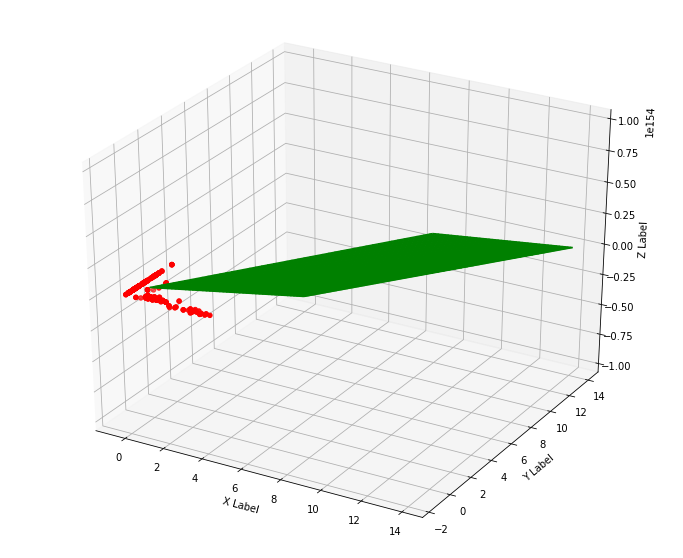

DescribeResult(nobs=506, minmax=(array([ 1.        , -0.48772236, -1.46588193]), array([1.        , 3.80423444, 2.73234648])), mean=array([ 1.00000000e+00, -6.34319123e-16,  2.49032240e-15]), variance=array([0.       , 1.0019802, 1.0019802]), skewness=array([0.        , 2.21906306, 0.72714416]), kurtosis=array([-3.        ,  3.97994877, -0.07586422]))
inf
[-3.46444441435195e+138, 6.704484240908968e+152, -6.704484240908893e+152]


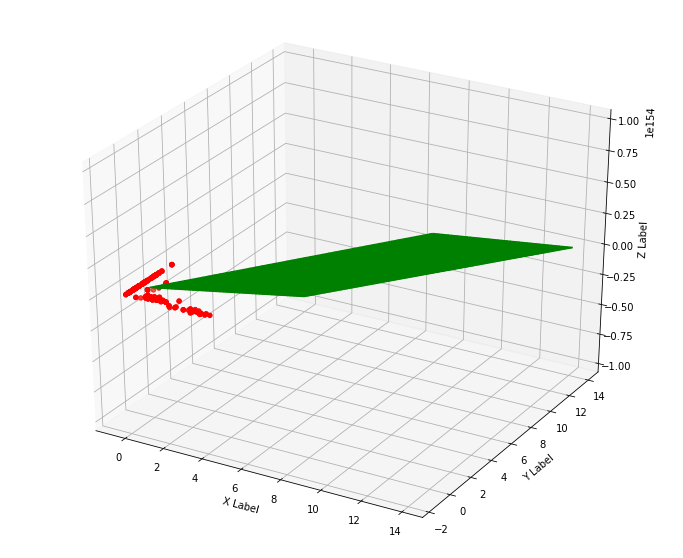

In [55]:
# -- Test 1  - reg simple
def display(fig_number,data_X,data_Y,data_b,data_c):
    plt.figure(fig_number,figsize=(10,6))
    x = np.linspace(-2,3,100)
    for i in range(0,len(data_b)-1,10): 
        y = data_b[i][0] + (x*data_b[i][1])
        plt.plot(x,y,color='gray')
        print(data_c[i])
    y = data_b[-1][0] + (x*data_b[-1][1])
    print(data_c[-1])
    print(data_b[-1])
    plt.plot(x,y,color='red')
    plt.scatter(standardisation(data_X)[:,1],data_Y)
    plt.xlabel(names[k])
    plt.show()
b, c = grad_descent((0,0),x1,Y,0.05,0.001,1000)
display(1,x1,Y,b,c)
b, c = grad_descent((5,-1),x1,Y,0.05,0.001,1000)
display(2,x1,Y,b,c)
#-- Test 2 - reg multiple
from mpl_toolkits.mplot3d import Axes3D
def display3D(fig_number,data_X,data_Y,data_b,data_c):
    fig = plt.figure(fig_number,figsize=(12,10))
    ax = fig.add_subplot(111, projection='3d')
    x = y = np.arange(0, 14, 0.05)
    x, y = np.meshgrid(x, y)
   # z = data_b[0][0] + (x*data_b[0][1]) + (y*data_b[0][2])
   # z = z.reshape(x.shape)
  #  ax.plot_surface(x,y,z,color='green')
    #for i in range(1,len(data_b)-1,10): 
        #z = data_b[i][0] + (x*data_b[i][1]) + (y*data_b[i][2])
       # z = z.reshape(x.shape)
        #print(data_c[i])
        #ax.plot_surface(x,y,z,color='gray')
    print(data_c[-1])
    print(data_b[-1])
    z = data_b[-1][0] + (x*data_b[-1][1]) + (y*data_b[-1][2])
    z = z.reshape(x.shape)
    ax.plot_wireframe(x,y,z,color='green')
    xx = standardisation(data_X)
    ax.scatter(xx[:,1],xx[:,2],data_Y,c='r', marker='o')
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    plt.show()
b, c = grad_descent((0,0,0),x2,Y,0.05,0.001,1000)
display3D(1,x2,Y,b,c)
b, c = grad_descent((12,1,1),x2,Y,0.05,0.001,1000)
display3D(1,x2,Y,b,c)

**Commentaires:**


## Test avec plusieurs pas de descente : visualisation de la fonction cout et des valeurs des paramètres au cours des itérations

DescribeResult(nobs=506, minmax=(array([1.   , 0.   , 0.385]), array([  1.   , 100.   ,   0.871])), mean=array([ 1.        , 11.36363636,  0.55469506]), variance=array([0.00000000e+00, 5.43936814e+02, 1.34276357e-02]), skewness=array([0.        , 2.21906306, 0.72714416]), kurtosis=array([-3.        ,  3.97994877, -0.07586422]))
[-4.681805307933591e+152, -1.3820572001029742e+153, 1.4910331835519747e+152]


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


In [54]:
#-- Test 1  - reg simple
b, c = grad_descent((0,0),x1,Y,0.001,10,1000)
display(3,x1,Y,b,c)
b, c = grad_descent((0,0),x1,Y,0.01,10,500)
display(4,x1,Y,b,c)
b, c = grad_descent((0,0),x1,Y,0.1,10,500)
display(5,x1,Y,b,c)


#-- Test 2 - reg multiple
b, c = grad_descent((0,0,0),x2,Y,0.001,10,500)
display3D(1,x2,Y,b,c)
b, c = grad_descent((12,1,1),x2,Y,0.01,10,500)
display3D(1,x2,Y,b,c)
b, c = grad_descent((12,1,1),x2,Y,0.1,10,500)
display3D(1,x2,Y,b,c)

DescribeResult(nobs=506, minmax=(array([ 1.        , -1.46588193]), array([1.        , 2.73234648])), mean=array([ 1.0000000e+00, -8.0710581e-16]), variance=array([0.       , 1.0019802]), skewness=array([0.        , 0.72714416]), kurtosis=array([-3.        , -0.07586422]))


IndexError: list index out of range

<Figure size 720x432 with 0 Axes>

**Commentaires:**

## Commentaires
**pour le choix du critère d'arrêt:**





**pour la standardisation des données:**





## Comparaison avec les résultats du maximum de vraisemblance

[22.53280632 -3.92622819]


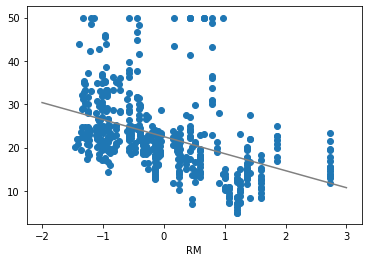

[22.53280632  1.75069683 -3.02181172]


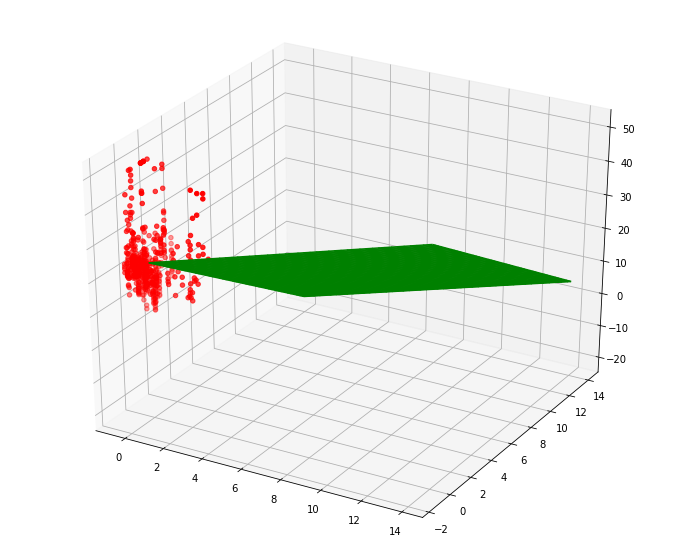

In [56]:
#-- Pour comparer avec le maximum de vraisemblance
#(X^T X)^-1 X^T Y
def coef_ml(x,y):
    x_standard = standardisation(x)
    trans = np.transpose(x_standard)
    return np.dot(np.dot(np.linalg.inv(np.dot(trans,x_standard)),trans),y)
    
#-- Test 1  - reg simple
maxi1 = coef_ml(x1,Y)
print(maxi1)
x = np.linspace(-2,3,100)
y = maxi1[0] + (x*maxi1[1])
plt.figure(6)
plt.plot(x,y,color='gray')
plt.scatter(standardisation(x1)[:,1],Y)
plt.xlabel(names[k])
plt.show()
#-- Test 2 - reg multiple
maxi2 = coef_ml(x2,Y)
print(maxi2)
fig = plt.figure(1,figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
x = y = np.arange(0, 14, 0.05)
x, y = np.meshgrid(x, y)
z = maxi2[0] + (x*maxi2[1]) + (y*maxi2[2])
z = z.reshape(x.shape)
ax.plot_wireframe(x,y,z,color='green')
xx = standardisation(x2)
ax.scatter(xx[:,1],xx[:,2],Y,c='r', marker='o')
plt.show()
#-- (ou bien utiliser la fonction native de sklearn)

**Commentaires:**